## PCA sklearn - real data

In [12]:
# pandas and numpy imports
import pandas as pd
import numpy as np

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

# import PCA
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# set sns theme and set pandas to display all rows and columns
sns.set_theme()


## Iris data demo

In [13]:
# Load iris dataset
iris = load_iris()

# Format iris dataset as dataframe
numeric_iris_df = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)

iris_df = numeric_iris_df.copy()
iris_df['label'] = iris['target_names'][iris['target']]


In [14]:
# Scale the data
standard_scaler = StandardScaler()
standard_scaler.fit(numeric_iris_df)
numeric_iris_df = standard_scaler.transform(numeric_iris_df)

In [15]:
# Perform PCA
pca = PCA()
pca.fit(numeric_iris_df)
pca_transformed_data = pca.transform(numeric_iris_df)

In [5]:
pca_transformed_data.shape

(150, 4)

In [16]:
# Determine variance explained by each component
[var_ration*100 for var_ration in pca.explained_variance_ratio_]

[np.float64(72.96244541329989),
 np.float64(22.85076178670175),
 np.float64(3.6689218892828785),
 np.float64(0.5178709107154797)]

In [17]:
# Plot first two principal components
iris_df_pca = pd.DataFrame(pca_transformed_data[:,:2], columns=['PC1', 'PC2'])
iris_df_pca['label'] = iris_df['label']

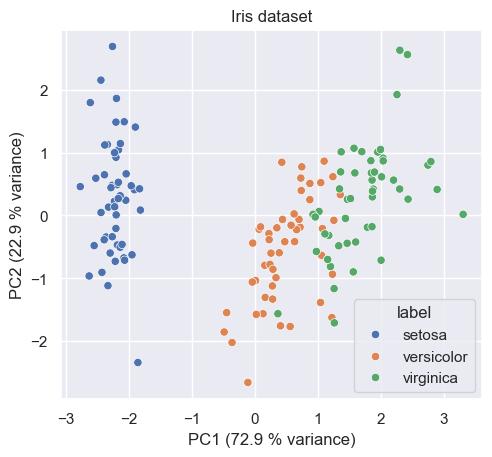

In [18]:
sns.scatterplot(iris_df_pca, x='PC1', y='PC2', hue='label')
plt.xlabel('PC1 (72.9 % variance)')
plt.ylabel('PC2 (22.9 % variance)')
plt.title('Iris dataset')
plt.gca().set_aspect('equal', adjustable='box')

In [ ]:
pca.components_
# In pca.components_, the rows correspond to the principal components (PCs), 
# and the columns correspond to the original features of the dataset.
# Each value in the matrix represents the weight (or loading) of a particular feature 
# in the corresponding principal component. For example, the value at [0, 2] is the 
# loading of the third original feature on the first principal component.



array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [10]:
iris_df.head().T

,0,1,2,3,4
sepal length (cm),5.1,4.9,4.7,4.6,5.0
sepal width (cm),3.5,3.0,3.2,3.1,3.6
petal length (cm),1.4,1.4,1.3,1.5,1.4
petal width (cm),0.2,0.2,0.2,0.2,0.2
label,setosa,setosa,setosa,setosa,setosa


Text(0.5, 1.0, 'Iris dataset')

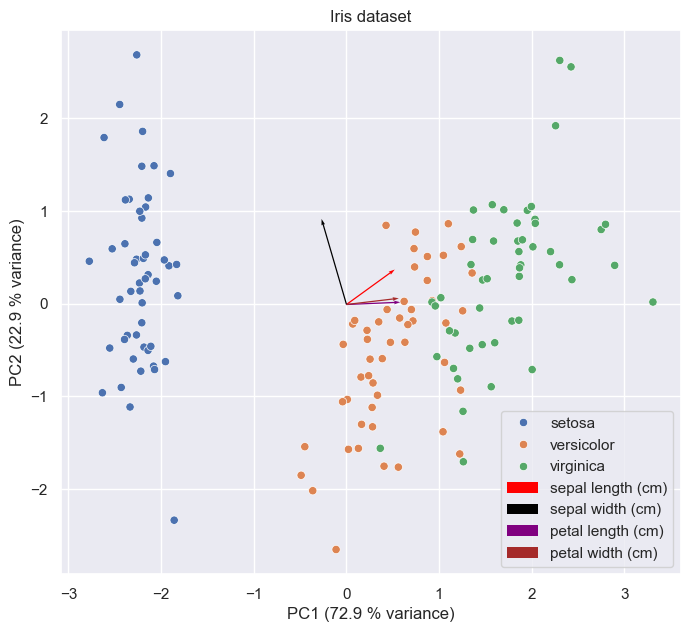

In [19]:
plt.figure(figsize=(8,8))
sns.scatterplot(iris_df_pca, x='PC1', y='PC2', hue='label')

feat_names = iris_df.columns
colors = ['red', 'black', 'purple', 'brown']

loadings = pca.components_

for i, feat_name, color in zip(range(loadings.shape[1]), feat_names, colors):
    
    plt.quiver(
        0, 0, 
        loadings[0, i],
        loadings[1, i], 
        angles='xy', scale_units='xy', 
        scale=1, color=color, 
        label=feat_name, 
        width=0.002
    )
    
plt.xlabel('PC1 (72.9 % variance)')
plt.ylabel('PC2 (22.9 % variance)')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Iris dataset')


### Iris - differences between solvers

In [20]:
pca_full = PCA(svd_solver='full').fit(numeric_iris_df)
pca_arpack = PCA(svd_solver='arpack').fit(numeric_iris_df)
pca_random = PCA(svd_solver='randomized').fit(numeric_iris_df)

In [21]:
print(pca_full.explained_variance_ratio_)
print(pca_arpack.explained_variance_ratio_)
print(pca_random.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922 0.00517871]
[0.72962445 0.22850762 0.03668922]
[0.72962445 0.22850762 0.03668922 0.00517871]


In [22]:
print(pca_full.components_)
print(pca_arpack.components_)
print(pca_random.components_)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


## Wine dataset

The Wine dataset is a classic multivariate dataset used for classification tasks in machine learning. 
- It consists of 178 samples of wine from three different cultivars (classes) in the same region in Italy. 
- Each sample has 13 continuous attributes (features) that are the result of a chemical analysis of the wines. 
- The goal of using this dataset is usually to build a classifier that can predict the cultivar of a wine based on its chemical composition.

The dataset contains following features:

- **Alcohol**: The alcohol content in the wine, measured in percentage.
- **Malic Acid**: The amount of malic acid in the wine, affecting its tartness.
- **Ash**: The measure of the non-aqueous residue remaining after heating, affecting wine stability.
- **Alcalinity of Ash**: A measure of the alkalinity of the ash formed post-combustion, impacting wine's acidity.
- **Magnesium**: The amount of magnesium in the wine, a cofactor in enzyme reactions.
- **Total Phenols**: The total amount of phenolic compounds, contributing to taste and mouthfeel.
- **Flavanoids**: A subset of phenolic compounds known to have antioxidant properties.
- **Nonflavanoid Phenols**: Phenolic compounds that are not flavanoids, contributing to color and flavor.
- **Proanthocyanins**: A class of phenolic compounds affecting color and astringency.
- **Color Intensity**: The intensity of the wine's color, measured optically.
- **Hue**: The color attribute that describes a pure color, usually measured via spectrophotometry.
- **OD280/OD315 of diluted wines**: The absorbance ratio at 280 and 315 nm, indicating protein content and wine stability.
- **Proline**: The amount of the amino acid proline, often linked to wine quality.

In [23]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine_data = load_wine()

wine_df_numeric = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

wine_df = wine_df_numeric.copy()
wine_df['label'] = wine_data.target

In [24]:
wine_df.shape

(178, 14)

In [25]:
# Label names
target_names = wine_data.target_names
target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [26]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [27]:
wine_df.isnull().sum().T

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64

In [28]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


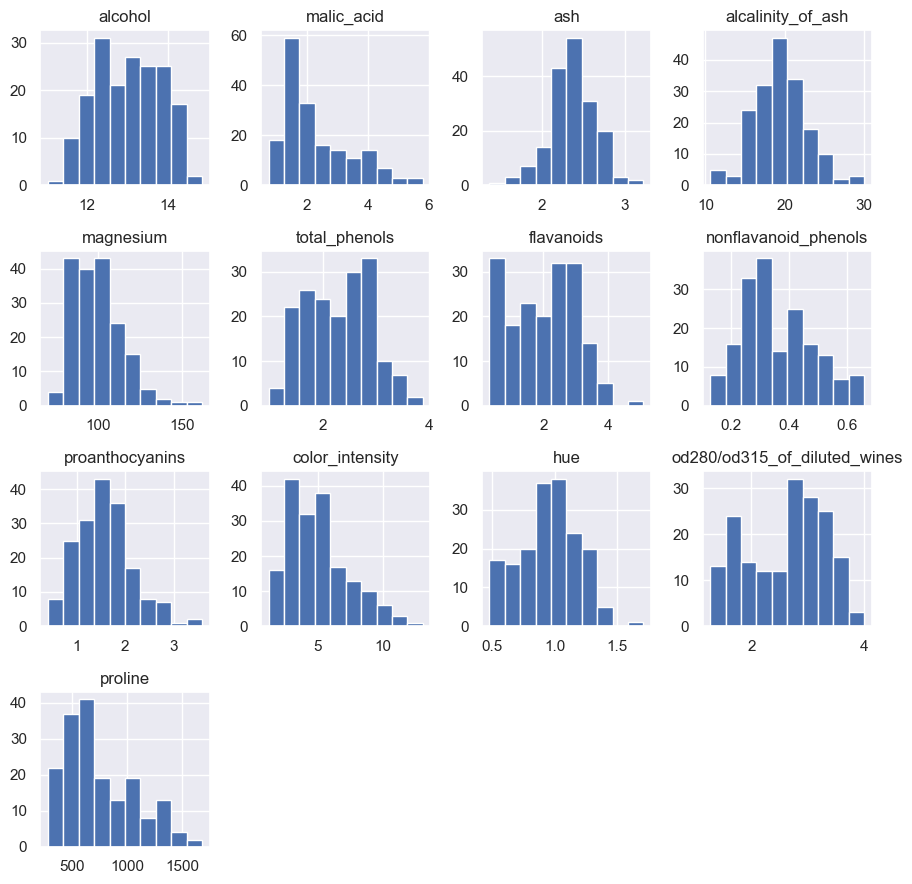

In [29]:
# Plot all the feature pairs
_ = wine_df_numeric.hist(figsize=(9,9))
plt.tight_layout()


/var/folders/34/4mb6rzb52l76jcqm_pjx3fph0000gn/T/ipykernel_85270/3135347301.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = g.set_xticklabels(g.get_xticklabels(), rotation=90)


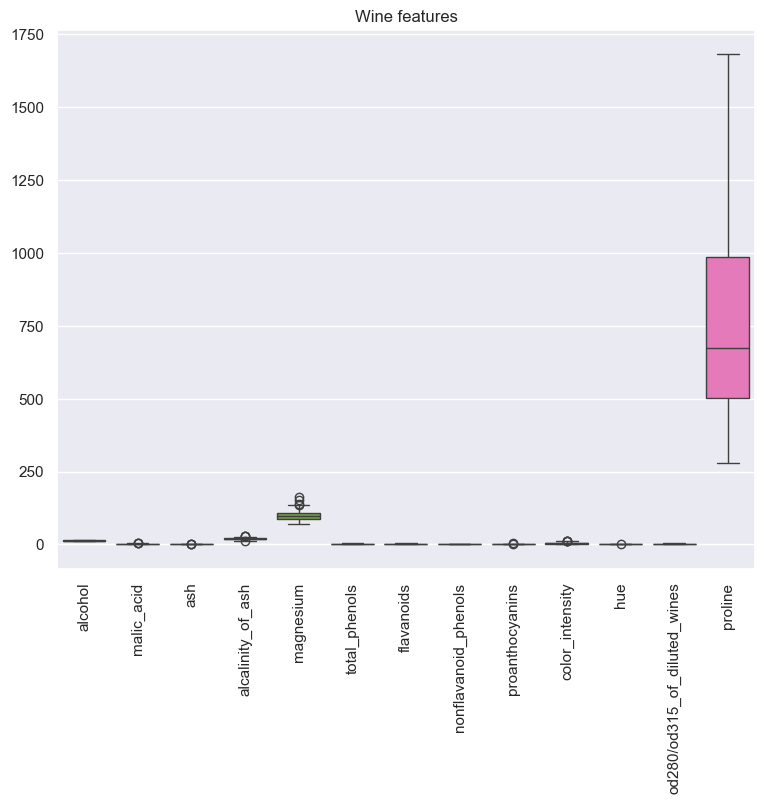

In [30]:
# Plot each individual feature
plt.figure(figsize=(9,7))
g = sns.boxplot(wine_df_numeric)
plt.title('Wine features')
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

### Run PCA without scaling

In [31]:
# Perform PCA without scaling the data
pca = PCA() 
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

# Determine variance explained by each component
[var_ration*100 for var_ration in pca.explained_variance_ratio_]

[np.float64(99.80912304918974),
 np.float64(0.17359156247057503),
 np.float64(0.009495895755146162),
 np.float64(0.005021735618215289),
 np.float64(0.0012363684687892054),
 np.float64(0.0008462130335244155),
 np.float64(0.00028068145572302205),
 np.float64(0.0001523080532856378),
 np.float64(0.00011278304393016523),
 np.float64(7.214158108199711e-05),
 np.float64(3.7806026651248e-05),
 np.float64(2.1201375460766782e-05),
 np.float64(8.253927880930899e-06)]

In [32]:
[comp*100 for comp in pca.components_[0]]

[np.float64(0.16592647196420918),
 np.float64(-0.06810155555013742),
 np.float64(0.019490574189158685),
 np.float64(-0.4671300581276237),
 np.float64(1.786800750689531),
 np.float64(0.0989829680081794),
 np.float64(0.15672883017930855),
 np.float64(-0.012308666181031418),
 np.float64(0.06006077918217637),
 np.float64(0.23271431925767413),
 np.float64(0.017138003714523817),
 np.float64(0.0704931644591048),
 np.float64(99.98229365233257)]

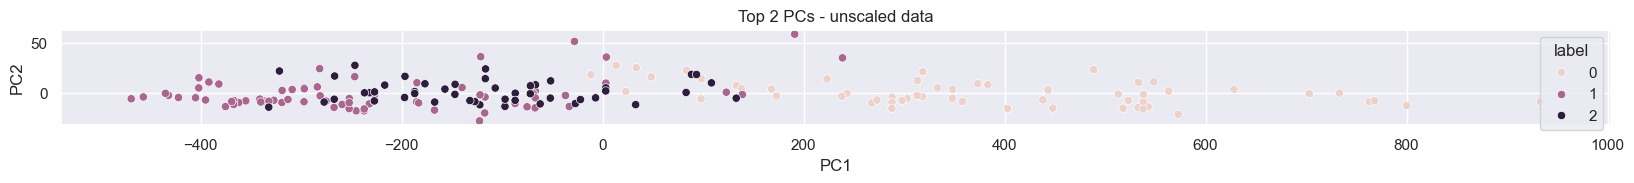

In [33]:
# Plot first two principal components
plt.figure(figsize=(20,20))
wine_df_pca = pd.DataFrame(pca_transformed_data[:,:2], columns=['PC1', 'PC2'])
wine_df_pca['label'] = wine_df['label']

sns.scatterplot(wine_df_pca, x='PC1', y='PC2', hue='label')
plt.title('Top 2 PCs - unscaled data')
plt.gca().set_aspect('equal', adjustable='box')

Text(0.5, 1.0, 'Proline feature vs vine types')

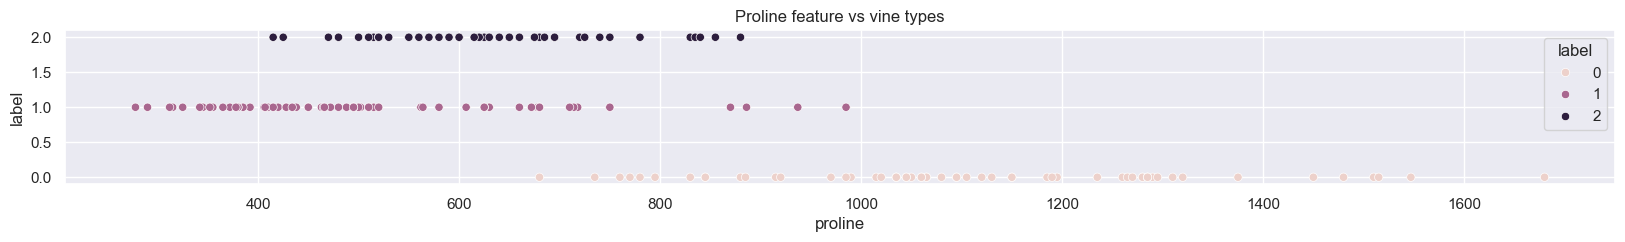

In [34]:
# Plot proline
plt.figure(figsize=(20,2))

sns.scatterplot(wine_df, x='proline', y='label', hue='label')
plt.title('Proline feature vs vine types')

### Run PCA with scaling

/var/folders/34/4mb6rzb52l76jcqm_pjx3fph0000gn/T/ipykernel_85270/895632531.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = g.set_xticklabels(g.get_xticklabels(), rotation=90)


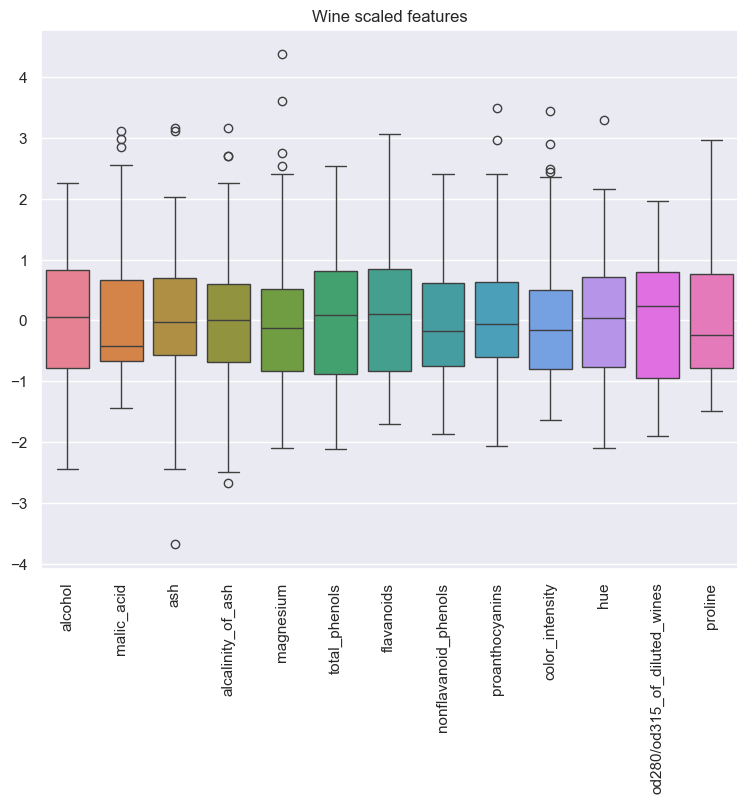

In [35]:
# Scale the data
standard_scaler = StandardScaler()
standard_scaler.fit(wine_df_numeric)
wine_df_numeric_scaled = standard_scaler.transform(wine_df_numeric)
wine_df_numeric = pd.DataFrame(
    wine_df_numeric_scaled, 
    columns = wine_df_numeric.columns
)

plt.figure(figsize=(9,7))
g = sns.boxplot(wine_df_numeric)
plt.title('Wine scaled features')
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

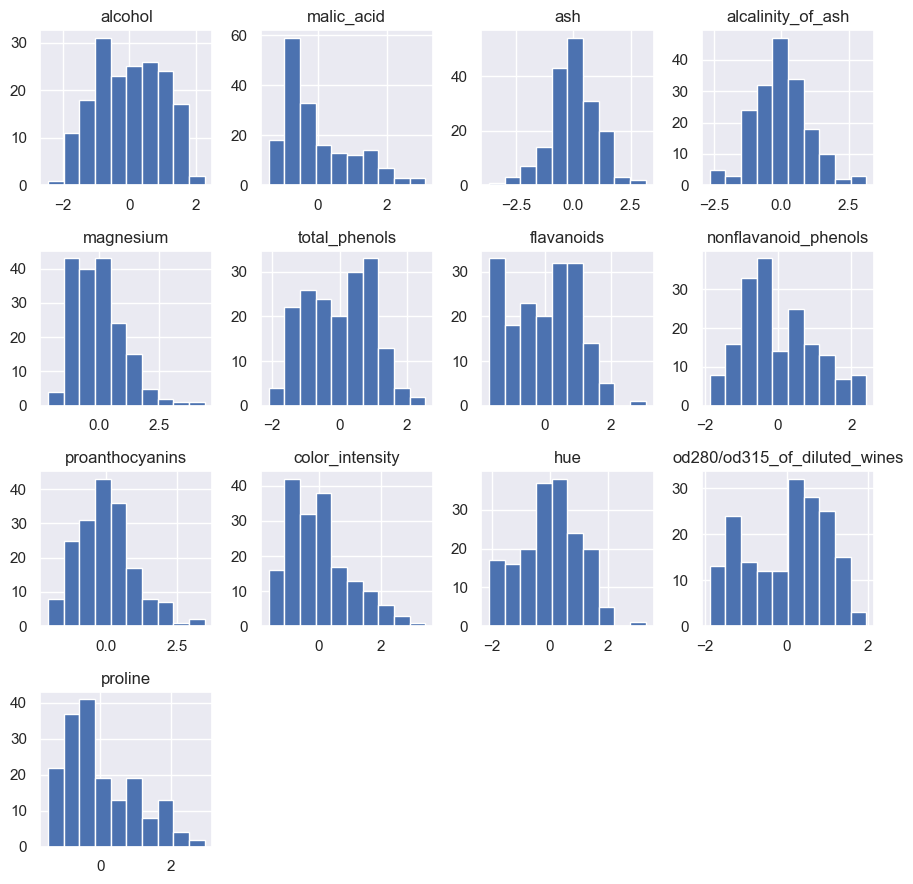

In [36]:
# Plot all the feature pairs
_ = wine_df_numeric.hist(figsize=(9,9))
plt.tight_layout()

In [37]:
# Perform PCA
pca = PCA()
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

In [38]:
# Determine variance explained by each component
[var_ration*100 for var_ration in pca.explained_variance_ratio_]

[np.float64(36.19884809992634),
 np.float64(19.207490257008942),
 np.float64(11.123630536249985),
 np.float64(7.069030182714033),
 np.float64(6.563293679648599),
 np.float64(4.935823319222569),
 np.float64(4.238679322623321),
 np.float64(2.680748948378867),
 np.float64(2.222153404789713),
 np.float64(1.9300190939440804),
 np.float64(1.7368356899899136),
 np.float64(1.2982325756042123),
 np.float64(0.7952148898994503)]

In [39]:
[comp*100 for comp in pca.components_[0]]

[np.float64(14.432939540601126),
 np.float64(-24.518758025722082),
 np.float64(-0.2051061444371178),
 np.float64(-23.932040548753502),
 np.float64(14.199204195298728),
 np.float64(39.46608450666304),
 np.float64(42.29342967100594),
 np.float64(-29.85331029547153),
 np.float64(31.34294883076889),
 np.float64(-8.861670472472309),
 np.float64(29.671456358638142),
 np.float64(37.61674107387128),
 np.float64(28.675222689680506)]

In [40]:
# Plot first two principal components
wine_df_pca = pd.DataFrame(pca_transformed_data[:,:2], columns=['PC1', 'PC2'])
wine_df_pca['label'] = wine_df['label']

Text(0, 0.5, 'PC1 [19 % variance]')

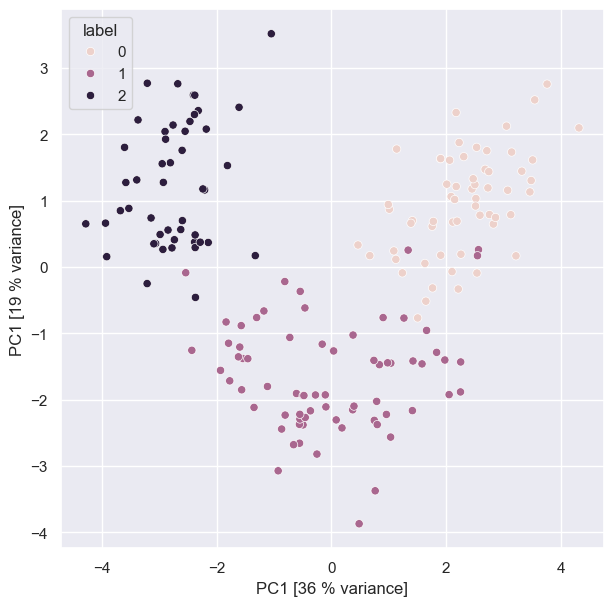

In [41]:
plt.figure(figsize=(7,7))
sns.scatterplot(wine_df_pca, x='PC1', y='PC2', hue='label')


plt.xlabel('PC1 [36 % variance]')
plt.ylabel('PC1 [19 % variance]')
